In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (7, 5)

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('Telco_Customer_Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 7043
Columns: 21


In [30]:
# Data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Check missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
# Drop rows with missing TotalCharges
df = df.dropna().reset_index(drop=True)

In [33]:
# Encode churn as binary
df['ChurnFlag'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [34]:
# Create tenure bands
def tenure_band(tenure):
    if tenure <= 3:
        return '0-3 Months'
    elif tenure <= 6:
        return '3-6 Months'
    elif tenure <= 12:
        return '6-12 Months'
    elif tenure <= 24:
        return '1-2 Years'
    else:
        return '2+ Years'

# Apply the function
df['TenureBand'] = df['tenure'].apply(tenure_band)


In [35]:
# Monthly charge segmentation
df['MonthlyChargeBucket'] = pd.cut(
df['MonthlyCharges'],
bins=[0, 35, 70, 100, 150],
labels=['Low', 'Medium', 'High', 'Very High']
)

In [8]:
contract_risk = {
'Month-to-month': 'High Risk',
'One year': 'Medium Risk',
'Two year': 'Low Risk'
}


df['ContractRisk'] = df['Contract'].map(contract_risk)

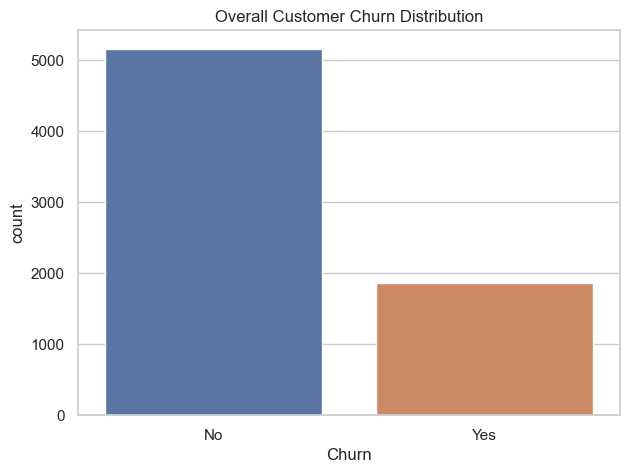

In [37]:
sns.countplot(x='Churn', data=df)
plt.title('Overall Customer Churn Distribution')
plt.show()

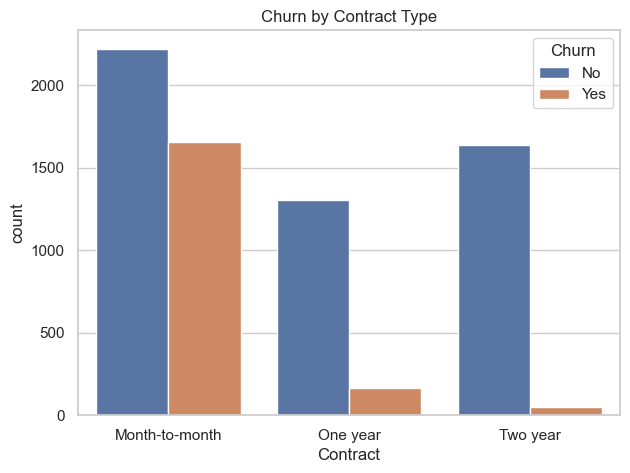

In [40]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

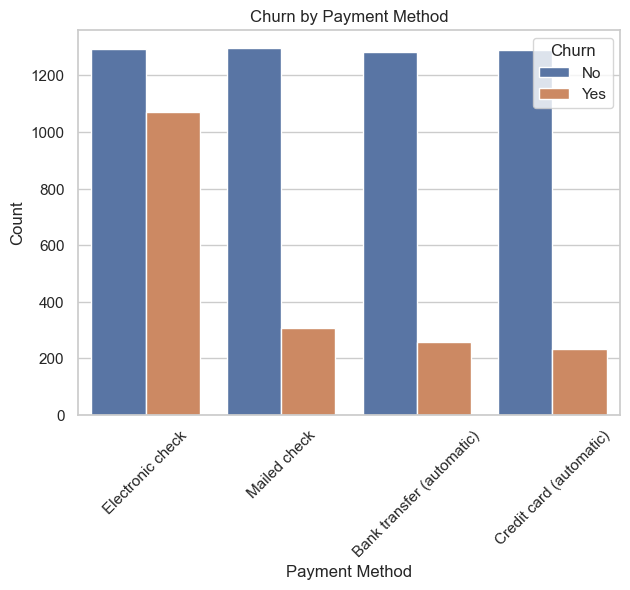

In [48]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df, x="PaymentMethod", hue="Churn", ax=ax)
ax.set_title("Churn by Payment Method")
ax.set_xlabel("Payment Method")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.show()

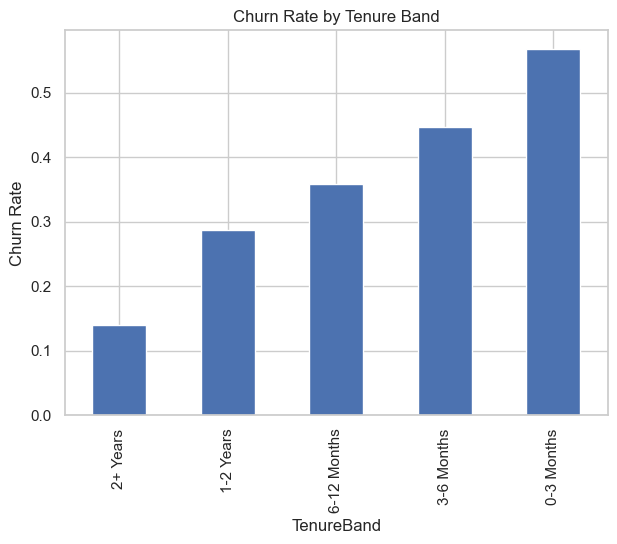

In [49]:
churn_tenure = df.groupby('TenureBand')['ChurnFlag'].mean().sort_values()
churn_tenure.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Band')
plt.show()

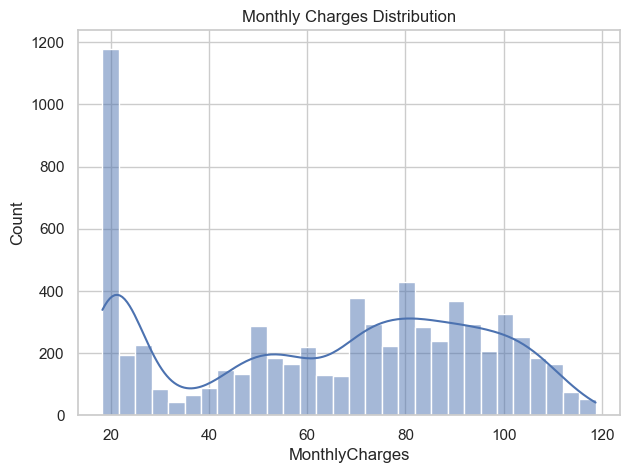

In [41]:
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

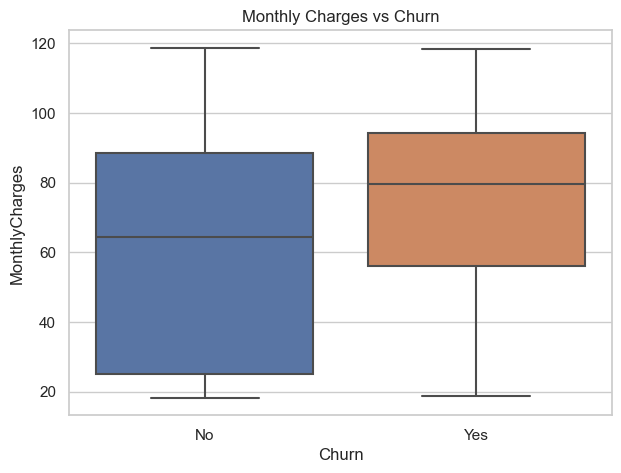

In [42]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

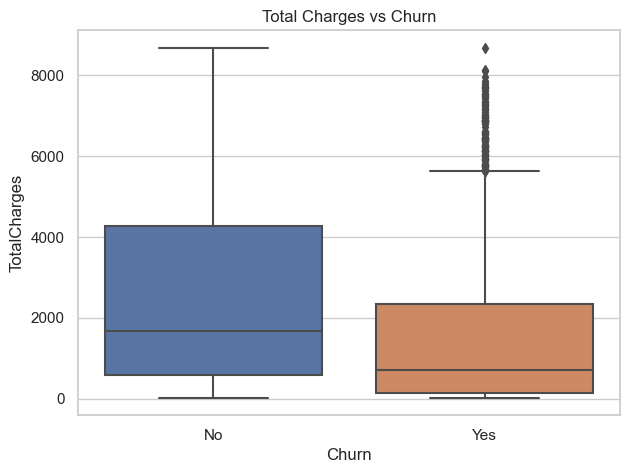

In [43]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()

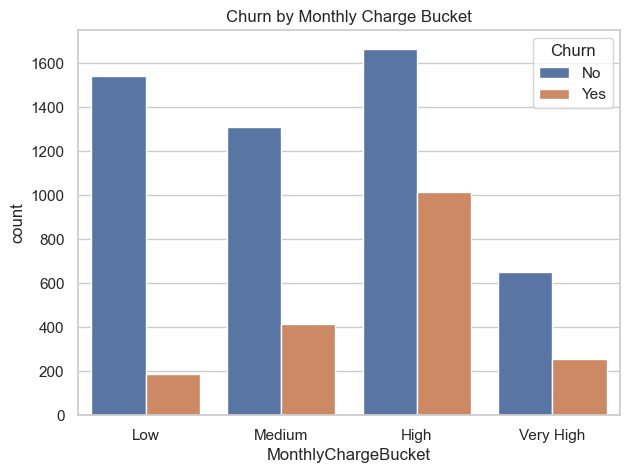

In [65]:
sns.countplot(x='MonthlyChargeBucket', hue='Churn', data=df)
plt.title('Churn by Monthly Charge Bucket')
plt.show()

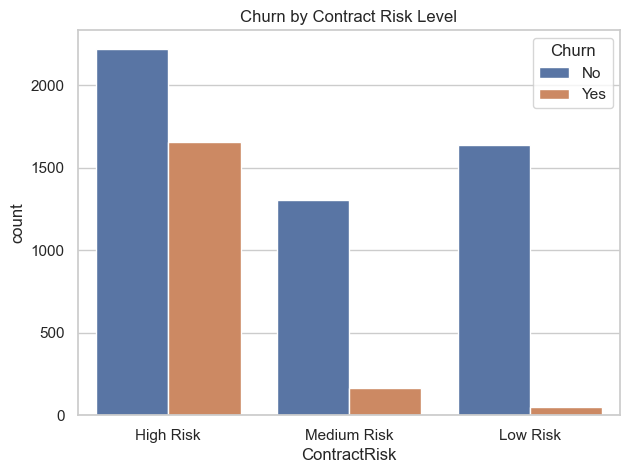

In [44]:
sns.countplot(x='ContractRisk', hue='Churn', data=df)
plt.title('Churn by Contract Risk Level')
plt.show()

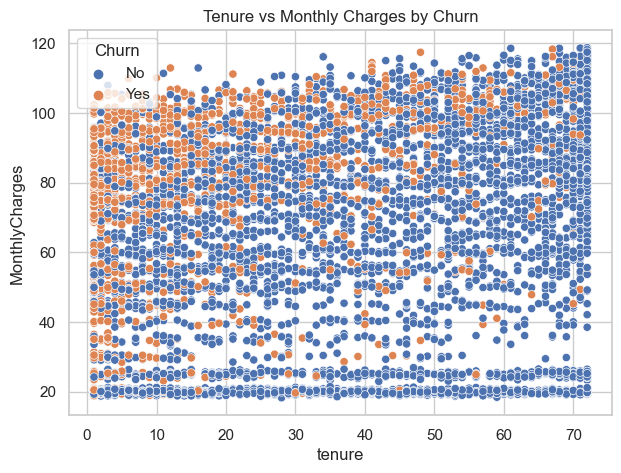

In [45]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()

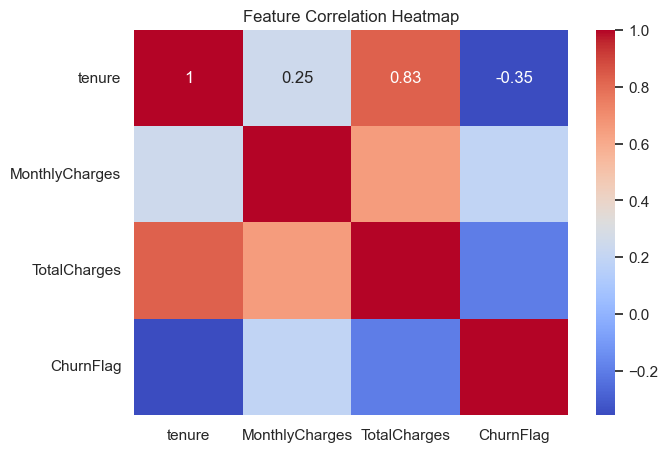

In [46]:
plt.figure(figsize=(7, 5))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnFlag']].corr(),
annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

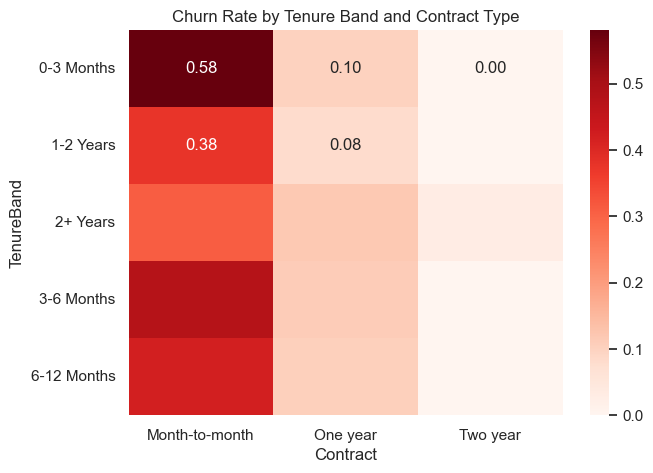

In [47]:
pivot = pd.pivot_table(
df,
values='ChurnFlag',
index='TenureBand',
columns='Contract',
aggfunc='mean'
)


sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Reds')
plt.title('Churn Rate by Tenure Band and Contract Type')
plt.show()

In [60]:
features = [
'tenure',
'MonthlyCharges',
'TotalCharges',
'TenureBand',
'MonthlyChargeBucket',
'ContractRisk'
]

X = df[features]
y = df['ChurnFlag']


In [61]:
X = pd.get_dummies(X, drop_first=True)

In [62]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.25,
random_state=42,
stratify=y
)

In [63]:
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.7861205915813424
ROC-AUC: 0.8306311028251924
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.63      0.48      0.55       467

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.77      0.79      0.78      1758



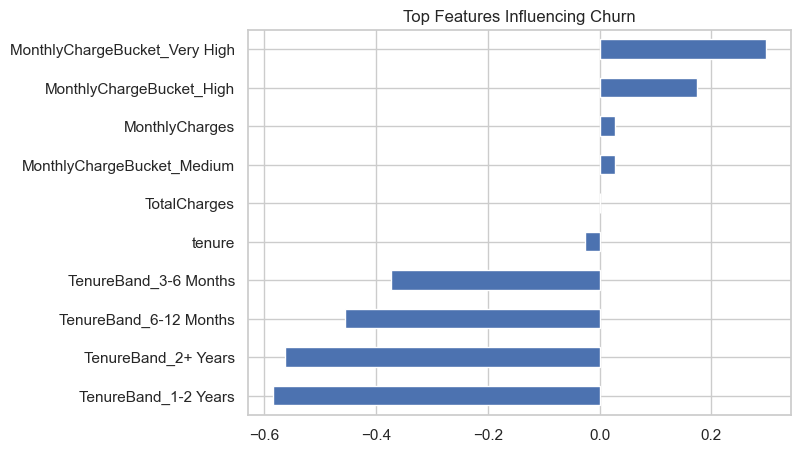

In [64]:
feature_importance = pd.Series(
log_model.coef_[0],
index=X.columns
).sort_values()


feature_importance.tail(10).plot(kind='barh')
plt.title('Top Features Influencing Churn')
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
n_estimators=200,
max_depth=10,
random_state=42
)


rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [59]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))

Accuracy: 0.7810011376564278
ROC-AUC: 0.8228569722523082
